# Assignmnet 1
Dataset:

data = pd.DataFrame(
    {
        'important_feature_poisson': np.random.poisson(5, 1000),
        'important_feature_dummy': np.random.binomial(1, 0.5, 1000),
        'random_feature_normal': np.random.normal(0, 100, 1000),
        'random_feature_dummy': np.random.binomial(1, 0.5, 1000)
    }
)

data['Y'] = (
    np.random.normal(5, 3, 1000) * data['important_feature_poisson'] + 
    np.random.normal(10, 3, 1000) * data['important_feature_dummy']
)
# Task:

Build a decision tree:

Use the given dataset with four features—two important ones (important_feature_poisson, important_feature_dummy) and two random ones (random_feature_normal, random_feature_dummy).
Control for overfitting by tuning hyperparameters such as alpha or others (e.g., max_depth, min_samples_split). Experiment with various values to find the optimal setup.
Compute and report the accuracy of your decision tree on the test dataset


# Note:
Have implemented my approach as well as referred to professors notebook L1D2 ml-deciisontree notebook


In [4]:
#import all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Dataset given 
Dataset and dataset description

In [6]:
data = pd.DataFrame({
    'important_feature_poisson': np.random.poisson(5, 1000),
    'important_feature_dummy': np.random.binomial(1, 0.5, 1000),
    'random_feature_normal': np.random.normal(0, 100, 1000),
    'random_feature_dummy': np.random.binomial(1, 0.5, 1000)
})

data['Y'] = (
    np.random.normal(5, 3, 1000) * data['important_feature_poisson'] + 
    np.random.normal(10, 3, 1000) * data['important_feature_dummy']
)




In [7]:
data.head()

,important_feature_poisson,important_feature_dummy,random_feature_normal,random_feature_dummy,Y
0,5,0,-141.411464,1,27.821369
1,2,0,77.157627,0,3.402575
2,5,0,65.232819,1,37.514238
3,7,0,48.189751,1,26.309166
4,6,1,-86.955217,0,-0.534808


In [8]:
data.describe()

,important_feature_poisson,important_feature_dummy,random_feature_normal,random_feature_dummy,Y
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,4.951000,0.479000,1.010577,0.49000,29.863909
std,2.232394,0.499809,100.334094,0.50015,19.834555
min,0.000000,0.000000,-316.925215,0.00000,-24.114527
25%,3.000000,0.000000,-62.887873,0.00000,15.780282
50%,5.000000,0.000000,0.601983,0.00000,27.190976
75%,6.000000,1.000000,70.355522,1.00000,40.578649
max,16.000000,1.000000,274.885841,1.00000,143.392624


In [9]:
print(data.isnull().sum())


important_feature_poisson    0
important_feature_dummy      0
random_feature_normal        0
random_feature_dummy         0
Y                            0
dtype: int64


In [10]:
print(data.shape)


(1000, 5)


In [11]:
print(data.dtypes)

important_feature_poisson      int64
important_feature_dummy        int64
random_feature_normal        float64
random_feature_dummy           int64
Y                            float64
dtype: object


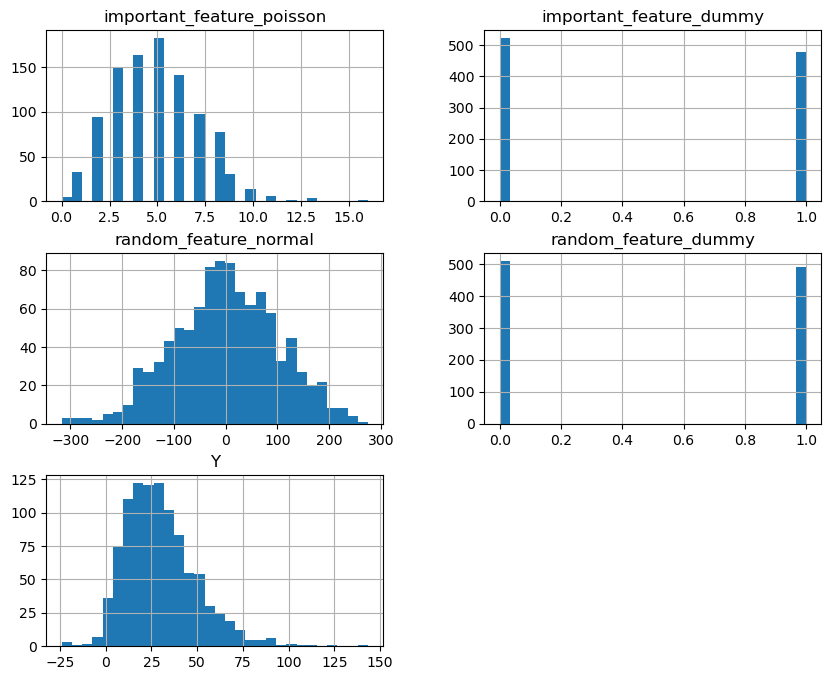

In [12]:
data.hist(bins=30, figsize=(10, 8))
plt.show()


# Data preprocessing and scaling

# initially I tried this
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Y', axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled['Y'] = data['Y']

But I read taht thus method is not ideal for machine learning because it violates the principle of data leakage. By scaling the entire dataset at once, we are giving the model access to information from the test set during the scaling process. This can lead to overly optimistic model performance, as the test data should not influence the scaling of the training data.



Above code is better because:
No data leakage: The test data is not used to calculate the scaling parameters (mean and standard deviation). The scaler is only fitted on the training data and then applied to both the training and test sets, ensuring that the model is evaluated on data it has not seen during the training process.

In [16]:
# Features and target split
X = data.drop('Y', axis=1)
y = data['Y']

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building Decision tree model
Refered from professor's given notebook of ml-decisiontree

## Approach 1: Basic decision tree

The results indicate that decision tree regressor has overfitted the training data. 

Train R2: This suggests that the model has perfectly fit the training data, meaning it is too complex and memorizing the data instead of generalizing.
Test R2: A negative R2 score means the model performs worse than a simple mean prediction on the test set, which indicates poor generalization.
Train MSE: The model has zero error on the training set, reinforcing that it's overfitting.
Test MSE: This high test MSE shows the model's poor performance on unseen data.


In [21]:
# Basic Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the scaled training data
dt_regressor.fit(X_train_scaled, y_train)

# Predictions on the scaled train and test data
y_train_pred = dt_regressor.predict(X_train_scaled)
y_test_pred = dt_regressor.predict(X_test_scaled)

# Calculate Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the results
print(f"Train R2: {train_r2}, Test R2: {test_r2}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")


Train R2: 1.0, Test R2: -0.05377053036553292
Train MSE: 0.0, Test MSE: 408.10645631560953


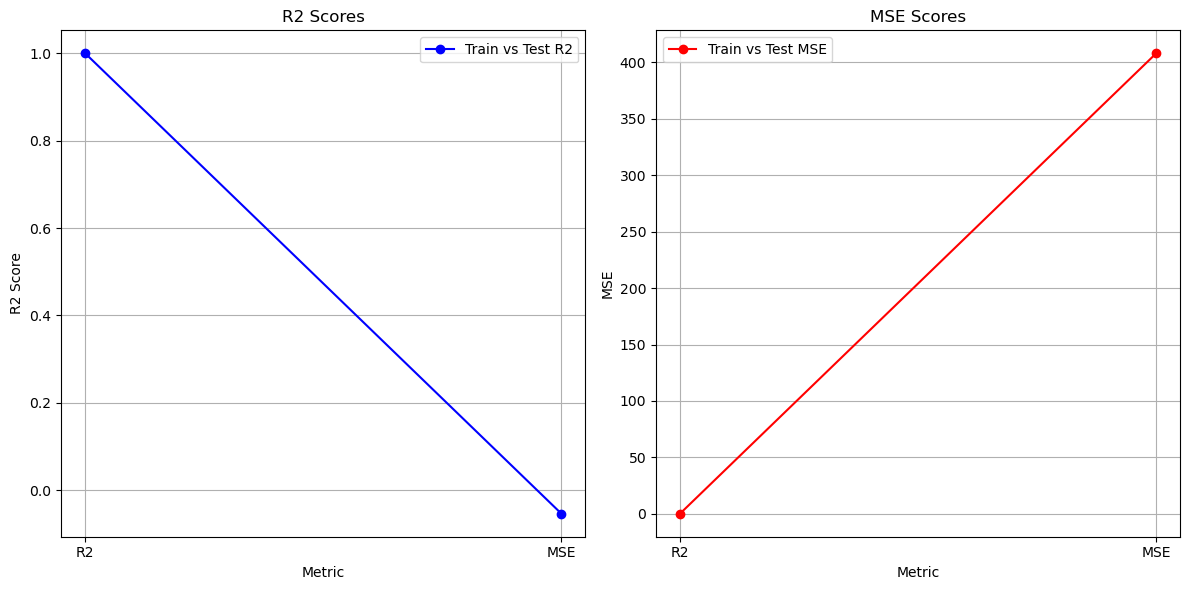

In [22]:
import matplotlib.pyplot as plt

# Create subplots for R2 and MSE values
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Data for plotting
metrics = ['R2', 'MSE']
train_scores = [train_r2, train_mse]
test_scores = [test_r2, test_mse]

# Plot R2 scores
axs[0].plot(metrics, [train_r2, test_r2], marker='o', linestyle='-', color='blue', label='Train vs Test R2')
axs[0].set_title('R2 Scores')
axs[0].set_xlabel('Metric')
axs[0].set_ylabel('R2 Score')
axs[0].legend()
axs[0].grid(True)

# Plot MSE scores
axs[1].plot(metrics, [train_mse, test_mse], marker='o', linestyle='-', color='red', label='Train vs Test MSE')
axs[1].set_title('MSE Scores')
axs[1].set_xlabel('Metric')
axs[1].set_ylabel('MSE')
axs[1].legend()
axs[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()


# Hyper parameter tunning 


## Tuning max_depth

Based on the results of tuning max_depth, we can observe that the model performs best with max_depth between 2 and 4, with the peak performance at max_depth = 3:

As the tree's depth increases beyond 3, the model starts to overfit again, causing a drop in the R2 score and an increase in MSE on the test set.
A max_depth of 1 also gives reasonable performance, but the deeper tree at depth 3 performs slightly better.

max_depth: 1, Test R2: 0.20379182728429068, Test MSE: 308.35716742222826
max_depth: 2, Test R2: 0.25955628863248226, Test MSE: 286.76059012824663
max_depth: 3, Test R2: 0.30227032316793767, Test MSE: 270.21820944204495
max_depth: 4, Test R2: 0.2746189083196101, Test MSE: 280.9271072529843
max_depth: 5, Test R2: 0.2835782184200175, Test MSE: 277.45732688738457
max_depth: 6, Test R2: 0.29070468433240304, Test MSE: 274.6973742546716
max_depth: 7, Test R2: 0.2445607655014539, Test MSE: 292.56808770884413
max_depth: 8, Test R2: 0.15801092871926548, Test MSE: 326.08728962809016
max_depth: 9, Test R2: 0.07475660741117074, Test MSE: 358.3301974177224
max_depth: 10, Test R2: 0.04228312153334879, Test MSE: 370.90659698852437


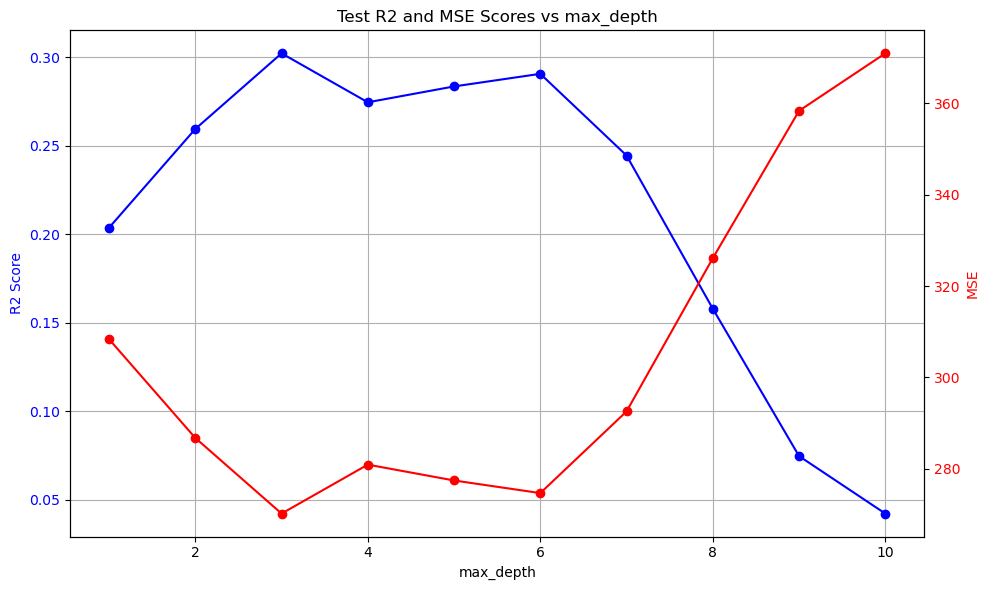

In [25]:
import matplotlib.pyplot as plt

# Create empty lists to store R2 and MSE for each max_depth
depths = range(1, 11)
r2_scores = []
mse_scores = []

# Tune 'max_depth' and collect R2 and MSE
for depth in depths:
    dt_regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_regressor.fit(X_train_scaled, y_train)
    
    y_test_pred = dt_regressor.predict(X_test_scaled)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append the results to the lists
    r2_scores.append(test_r2)
    mse_scores.append(test_mse)
    
    print(f"max_depth: {depth}, Test R2: {test_r2}, Test MSE: {test_mse}")

# Plot the R2 and MSE values in one graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot R2 scores
ax1.set_xlabel('max_depth')
ax1.set_ylabel('R2 Score', color='blue')
ax1.plot(depths, r2_scores, marker='o', linestyle='-', color='blue', label='Test R2')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for MSE scores
ax2 = ax1.twinx()
ax2.set_ylabel('MSE', color='red')
ax2.plot(depths, mse_scores, marker='o', linestyle='-', color='red', label='Test MSE')
ax2.tick_params(axis='y', labelcolor='red')

# Title and show the plot
plt.title('Test R2 and MSE Scores vs max_depth')
fig.tight_layout()
plt.show()


## Tuning min_samples_split
The results show that increasing the min_samples_split significantly improves the model's performance:

The Test R2 improves steadily, peaking at around min_samples_split = 20.
Lower values of min_samples_split (like 2 and 4) lead to worse generalization and overfitting, as indicated by the negative R2 values.

Increasing min_samples_split forces the decision tree to require more samples before it can split a node, thus preventing the model from creating overly specific splits that lead to overfitting.

min_samples_split: 2, Test R2: -0.05377053036553292, Test MSE: 408.10645631560953
min_samples_split: 4, Test R2: 0.028775047097891138, Test MSE: 376.1380323253902
min_samples_split: 6, Test R2: 0.08280863455814336, Test MSE: 355.2117914930775
min_samples_split: 8, Test R2: 0.09654676504574244, Test MSE: 349.8912595668803
min_samples_split: 10, Test R2: 0.09041432352134449, Test MSE: 352.2662443543336
min_samples_split: 12, Test R2: 0.10948506264559699, Test MSE: 344.88048859532756
min_samples_split: 14, Test R2: 0.15019613510728924, Test MSE: 329.1138192528228
min_samples_split: 16, Test R2: 0.13457724613353383, Test MSE: 335.16273526156255
min_samples_split: 18, Test R2: 0.1258814763764976, Test MSE: 338.5304511714481
min_samples_split: 20, Test R2: 0.13232196137241847, Test MSE: 336.03616666367446


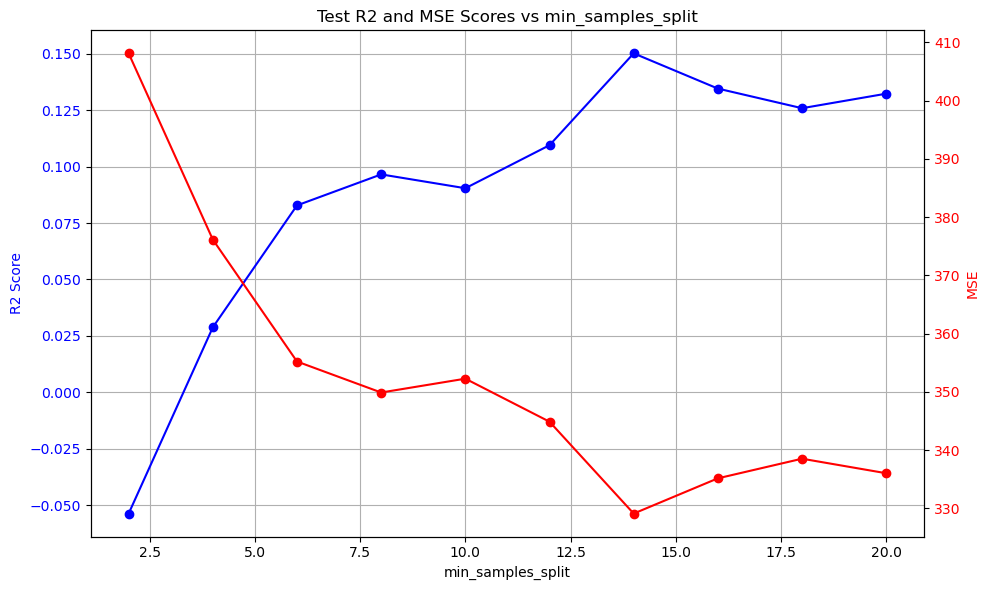

In [27]:
import matplotlib.pyplot as plt

# Create empty lists to store R2 and MSE for each min_samples_split
min_samples_range = range(2, 21, 2)
r2_scores = []
mse_scores = []

# Tune 'min_samples_split' and collect R2 and MSE
for min_samples in min_samples_range:
    dt_regressor = DecisionTreeRegressor(min_samples_split=min_samples, random_state=42)
    dt_regressor.fit(X_train_scaled, y_train)
    
    y_test_pred = dt_regressor.predict(X_test_scaled)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append the results to the lists
    r2_scores.append(test_r2)
    mse_scores.append(test_mse)
    
    print(f"min_samples_split: {min_samples}, Test R2: {test_r2}, Test MSE: {test_mse}")

# Plot the R2 and MSE values in one graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot R2 scores
ax1.set_xlabel('min_samples_split')
ax1.set_ylabel('R2 Score', color='blue')
ax1.plot(min_samples_range, r2_scores, marker='o', linestyle='-', color='blue', label='Test R2')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for MSE scores
ax2 = ax1.twinx()
ax2.set_ylabel('MSE', color='red')
ax2.plot(min_samples_range, mse_scores, marker='o', linestyle='-', color='red', label='Test MSE')
ax2.tick_params(axis='y', labelcolor='red')

# Title and show the plot
plt.title('Test R2 and MSE Scores vs min_samples_split')
fig.tight_layout()
plt.show()


## Tuning min_samples_leaf
The results indicate that increasing the min_samples_leaf parameter improves the model's generalization performance significantly:

The Test R2 improves as you increase min_samples_leaf, with the best performance at min_samples_leaf = 10, achieving an R2.
Lower values of min_samples_leaf lead to poorer performance, similar to what you've seen with other hyperparameters like min_samples_split

Summary of Findings:
The best value for min_samples_leaf appears to be 10.
Further improvements may be achieved by tuning other hyperparameters or combining these values in a grid search.

min_samples_leaf: 1, Test R2: -0.05377053036553292, Test MSE: 408.10645631560953
min_samples_leaf: 2, Test R2: 0.07250676016311752, Test MSE: 359.20152296839603
min_samples_leaf: 3, Test R2: 0.13757246618094077, Test MSE: 334.00274017324983
min_samples_leaf: 4, Test R2: 0.21514875078038076, Test MSE: 303.9588343230581
min_samples_leaf: 5, Test R2: 0.23590178559656383, Test MSE: 295.9215555677972
min_samples_leaf: 6, Test R2: 0.22797746833130783, Test MSE: 298.9905017421815
min_samples_leaf: 7, Test R2: 0.26735946431633884, Test MSE: 283.73855991903
min_samples_leaf: 8, Test R2: 0.27718573057781193, Test MSE: 279.93302295701955
min_samples_leaf: 9, Test R2: 0.27626367908219196, Test MSE: 280.2901169898993
min_samples_leaf: 10, Test R2: 0.2878932799177317, Test MSE: 275.7861808400518


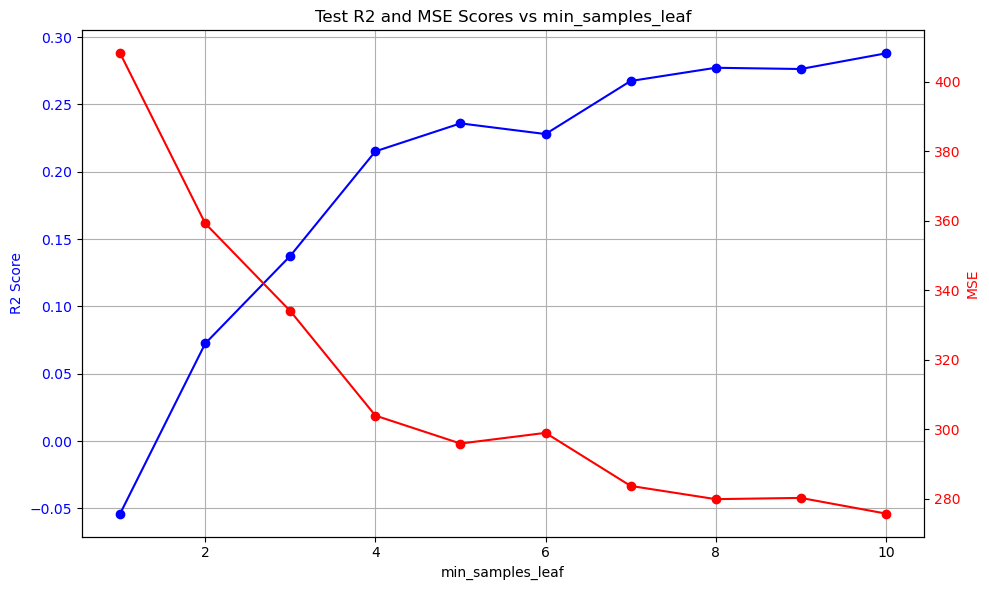

In [29]:
import matplotlib.pyplot as plt

# Create empty lists to store R2 and MSE for each min_samples_leaf
min_samples_leaf_range = range(1, 11)
r2_scores = []
mse_scores = []

# Tune 'min_samples_leaf' and collect R2 and MSE
for min_samples_leaf in min_samples_leaf_range:
    dt_regressor = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    dt_regressor.fit(X_train_scaled, y_train)
    
    y_test_pred = dt_regressor.predict(X_test_scaled)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Append the results to the lists
    r2_scores.append(test_r2)
    mse_scores.append(test_mse)
    
    print(f"min_samples_leaf: {min_samples_leaf}, Test R2: {test_r2}, Test MSE: {test_mse}")

# Plot the R2 and MSE values in one graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot R2 scores
ax1.set_xlabel('min_samples_leaf')
ax1.set_ylabel('R2 Score', color='blue')
ax1.plot(min_samples_leaf_range, r2_scores, marker='o', linestyle='-', color='blue', label='Test R2')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis for MSE scores
ax2 = ax1.twinx()
ax2.set_ylabel('MSE', color='red')
ax2.plot(min_samples_leaf_range, mse_scores, marker='o', linestyle='-', color='red', label='Test MSE')
ax2.tick_params(axis='y', labelcolor='red')

# Title and show the plot
plt.title('Test R2 and MSE Scores vs min_samples_leaf')
fig.tight_layout()
plt.show()


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 30],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Score: {grid_search.best_score_}")

# Use the best model found by Grid Search to make predictions on the test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)

# Calculate test set performance
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the results
print(f"Test R2 (Best Model): {test_r2}")
print(f"Test MSE (Best Model): {test_mse}")


Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Cross-Validated Score: 0.27656248264713773
Test R2 (Best Model): 0.2790807618805796
Test MSE (Best Model): 279.1991112681897


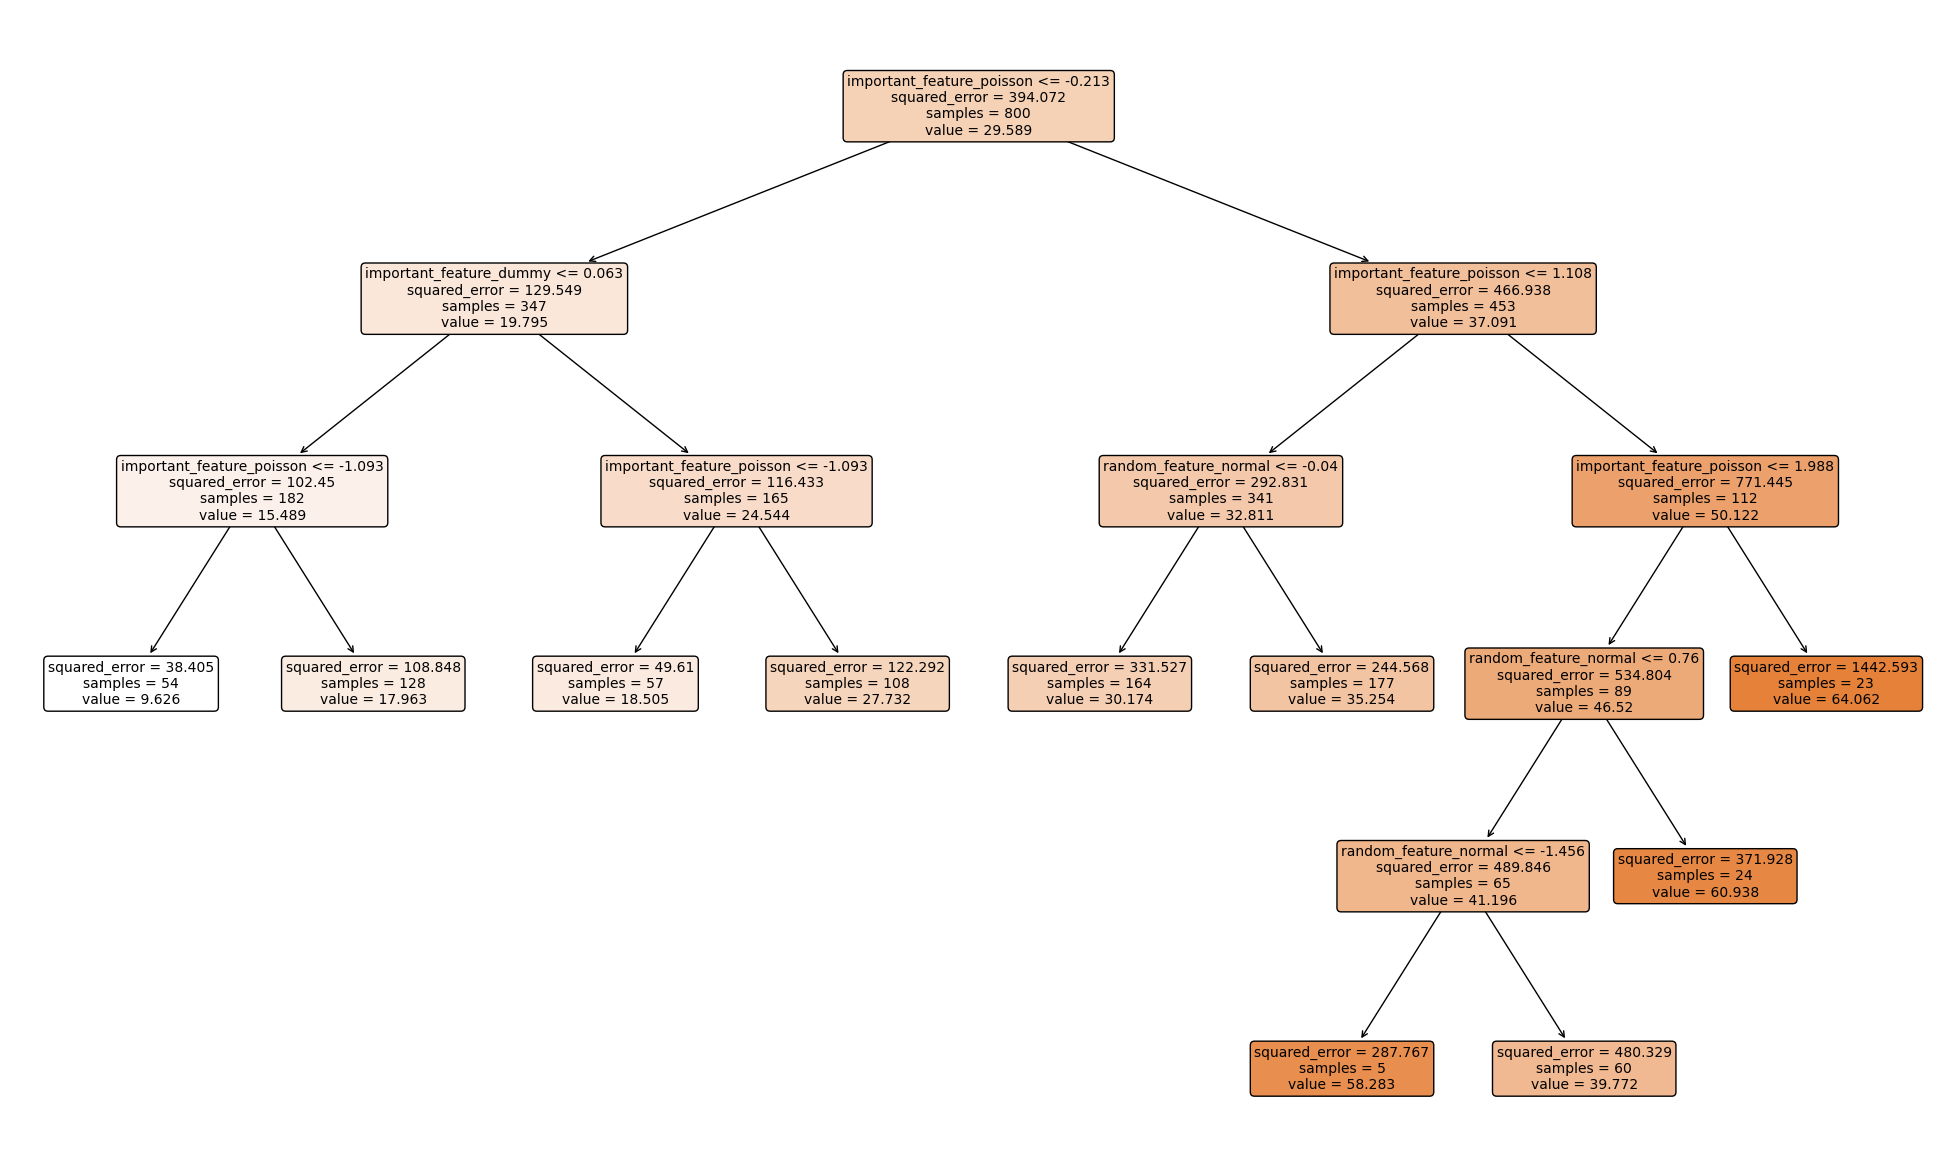

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))
plot_tree(best_model, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

In [32]:
# Feature importance after the best model
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

important_feature_poisson    0.843582
random_feature_normal        0.093726
important_feature_dummy      0.062692
random_feature_dummy         0.000000
dtype: float64


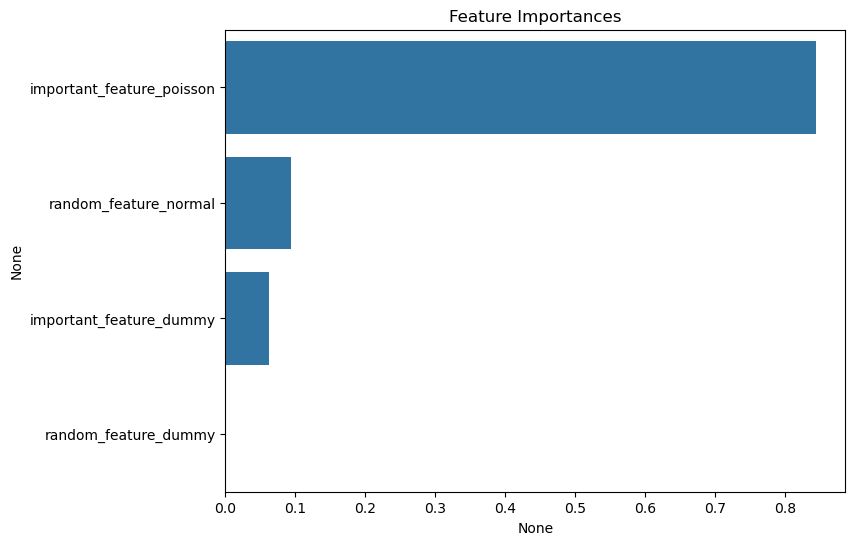

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

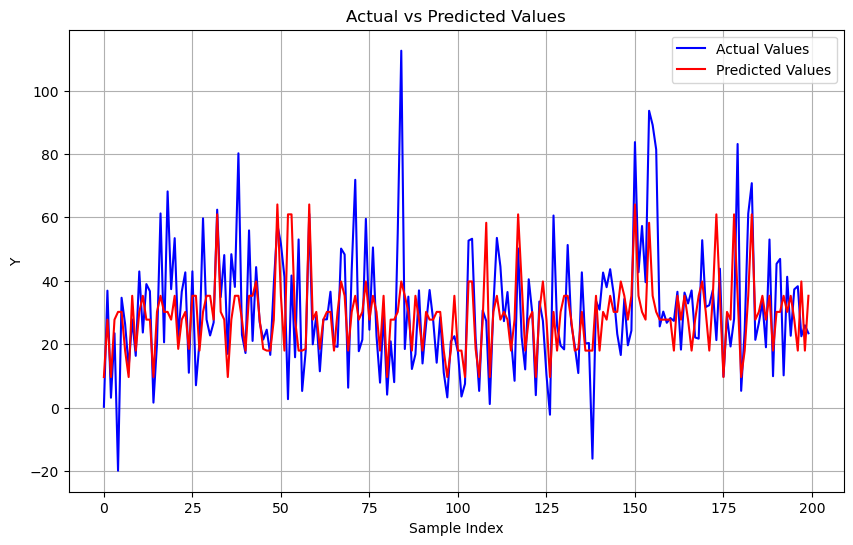

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Values', color='blue')
plt.plot(np.arange(len(y_test)), y_test_pred, label='Predicted Values', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Bagging
The result from the Bagging Regressor shows that it's performing better than the individual decision tree:

Test R2: This is a decent improvement, indicating the model explains about 33.6% of the variance in the test data.
Test MSE: The lower MSE compared to the individual decision tree model indicates that the Bagging Regressor generalizes better.


In [36]:
from sklearn.ensemble import BaggingRegressor

# Initialize Bagging Regressor with Decision Tree as the base estimator
bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=3, random_state=42),  # Change 'base_estimator' to 'estimator'
    n_estimators=100,  # Number of base estimators (trees)
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the bagging regressor
bagging_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_test_pred_bagging = bagging_regressor.predict(X_test_scaled)

# Calculate performance metrics for bagging
test_r2_bagging = r2_score(y_test, y_test_pred_bagging)
test_mse_bagging = mean_squared_error(y_test, y_test_pred_bagging)

# Print the results
print(f"Bagging Regressor - Test R2: {test_r2_bagging}")
print(f"Bagging Regressor - Test MSE: {test_mse_bagging}")


Bagging Regressor - Test R2: 0.33642473296103703
Bagging Regressor - Test MSE: 256.9908181395212


## K folds
The results  indicate that the model's performance using K-Folds Cross-Validation is a bit better compared to the best model found using GridSearchCV on a single split. This is expected since K-Folds Cross-Validation averages the model's performance over multiple splits, providing a more robust and less optimistic estimate of generalization performance compared to evaluating it on a single train-test split.

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize KFold with 5 splits (can change n_splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store R2 and MSE for each fold
r2_scores = []
mse_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets for the current fold
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Scale the features
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_test_fold_scaled = scaler.transform(X_test_fold)
    
    # Initialize the Decision Tree Regressor with the best parameters from GridSearch
    dt_regressor = DecisionTreeRegressor(
        max_depth=grid_search.best_params_['max_depth'],
        min_samples_split=grid_search.best_params_['min_samples_split'],
        min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
        max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],
        ccp_alpha=grid_search.best_params_['ccp_alpha'],
        random_state=42
    )
    
    # Fit the model on the training data for the current fold
    dt_regressor.fit(X_train_fold_scaled, y_train_fold)
    
    # Predict on the test set for the current fold
    y_test_pred_fold = dt_regressor.predict(X_test_fold_scaled)
    
    # Calculate R2 and MSE for the current fold
    test_r2_fold = r2_score(y_test_fold, y_test_pred_fold)
    test_mse_fold = mean_squared_error(y_test_fold, y_test_pred_fold)
    
    # Store the scores
    r2_scores.append(test_r2_fold)
    mse_scores.append(test_mse_fold)
    
    print(f"Fold R2: {test_r2_fold}, Fold MSE: {test_mse_fold}")

# Calculate the mean and standard deviation of R2 and MSE across all folds
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
std_r2 = np.std(r2_scores)
std_mse = np.std(mse_scores)

# Print the results
print(f"Mean R2 across folds: {mean_r2} ± {std_r2}")
print(f"Mean MSE across folds: {mean_mse} ± {std_mse}")


Fold R2: 0.2790807618805796, Fold MSE: 279.1991112681897
Fold R2: 0.3173615422871824, Fold MSE: 306.0391545311038
Fold R2: 0.3808391408072379, Fold MSE: 254.00075154540372
Fold R2: 0.27978949819074606, Fold MSE: 241.73949591494537
Fold R2: 0.20003096170206036, Fold MSE: 303.99291214314695
Mean R2 across folds: 0.29142038097356127 ± 0.05883575111943706
Mean MSE across folds: 276.9942850805579 ± 25.88047258736107
